## import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [32]:
dataset = pd.read_csv(r"C:\Users\ELCOT\Desktop\Big Data Hadoop _ Spark Exam\Dataset\boston.csv", sep=',', skipinitialspace=True)

# QN.1:Read the given CSV file in a Hive table

In [4]:
#pip install pyspark

In [5]:
from pyspark.sql import SparkSession

In [6]:
spark = SparkSession.builder.appName("MLhands-on").enableHiveSupport().getOrCreate()

RuntimeError: Java gateway process exited before sending its port number

# Qn.2:Read the data from Hive table as spark dataframe

In [7]:
df=spark.read.csv('boston.csv',header='true', inferSchema='true')

NameError: name 'spark' is not defined

In [37]:
# import findSpark
import findspark
findspark.init()

In [38]:
try:
    print("PySpark found!")
    from pyspark.sql import SparkSession
    from pyspark.ml.feature import StandardScaler
except ImportError as error:
    raise ImportError('Spark was not found!')
    exit()

PySpark found!


In [11]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
#the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# QN.3: Get the correlation between dependent and independent variables

<AxesSubplot:>

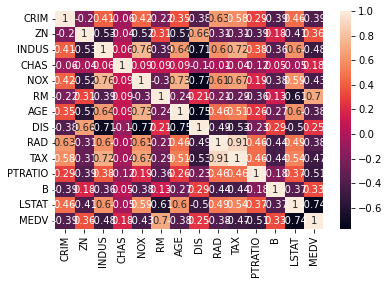

In [13]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [27]:
boston.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [30]:
f_c = dataset.columns[:-1]

In [34]:
f_c

Index([], dtype='object')

# QN.4: Build a linear regression model to predict house price

In [18]:
from pyspark.ml.feature import VectorAssembler

In [35]:
assembler = VectorAssembler(inputCols=f_c , outputCol= "features")

AttributeError: Cannot load _jvm from SparkContext. Is SparkContext initialized?

In [8]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

# QN.5: Evaluate the Linear Regression model by getting the RMSE and R-squared values

In [12]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))


print('RMSE is {}'.format(rmse))



RMSE is 5.6371293350711955


In [48]:
print("Training Accuracy:",lin_model.score(X_train, Y_train) * 100)

Training Accuracy: 63.007451493317014


In [51]:
from sklearn.metrics import mean_squared_error, r2_score
print("Model accuracy:", r2_score(Y,lin_model.predict(X)) * 100)

Model accuracy: 63.64367726715208


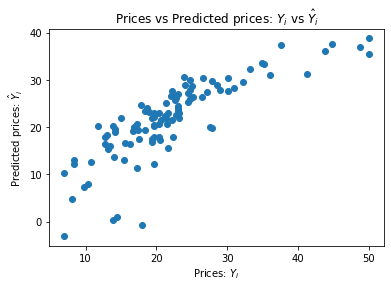

In [19]:


lin_model.fit(X_train, Y_train)

Y_pred = lin_model.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


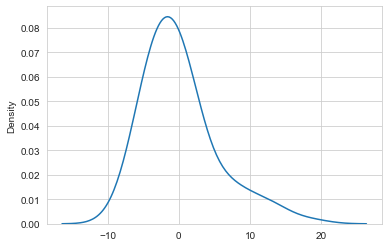

In [20]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


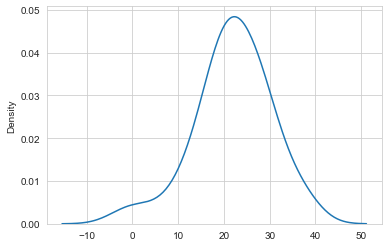

In [21]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()